End-to-end Machine Learning with Tensorflow on GCP
https://codelabs.developers.google.com/codelabs/end-to-end-ml/index.html?index=..%2F..index#1

Practicing python and analytics

In [1]:
query = """
SELECT
    weight_pounds,
    is_male,
    mother_age,
    plurality,
    gestation_weeks
FROM
    publicdata.samples.natality
WHERE
    year > 2000
"""
from google.cloud import bigquery
df = bigquery.Client().query( query + " LIMIT 100" ).to_dataframe()
df.head()

,weight_pounds,is_male,mother_age,plurality,gestation_weeks
0,8.249698,True,24,1,41.0
1,4.312242,True,19,1,38.0
2,6.750554,False,35,1,42.0
3,8.375361,True,30,1,40.0
4,8.313632,True,20,1,44.0


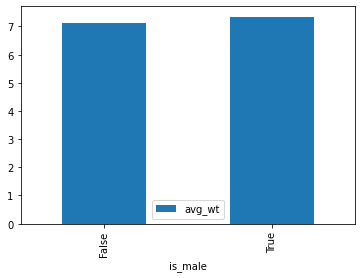

In [14]:
def get_distinct_values( column_name ):
      sql = """
SELECT
      {0},
      COUNT(1) AS num_babies,
      AVG(weight_pounds) AS avg_wt
FROM
      publicdata.samples.natality
WHERE
      year > 2000
GROUP BY
      {0}
      """.format( column_name )
      return bigquery.Client().query( sql ).to_dataframe()

df = get_distinct_values( 'is_male' )
df.plot( x = 'is_male', y = 'avg_wt', kind = 'bar' );

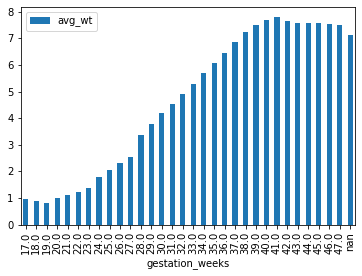

In [15]:
df = get_distinct_values( 'gestation_weeks' )
df = df.sort_values( 'gestation_weeks' )
df.plot( x = 'gestation_weeks', y = 'avg_wt', kind = 'bar' )